<a href="https://colab.research.google.com/github/BillGrieser/ML-for-NewProgrammers/blob/master/MLforMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning for New Programmers

This notebook illustrates a few basic concepts of Machine Learning. It is designed for students that are learning how to program.

## What is Machine Learning?

For any program you are going to write, you start with having something in mind that you want the program to do: play a game like Rock-Paper-Scissors or Dr. NIM, add up items in a shopping cart, or whatever. 

**Standard Approach**
1. You have something in mind you want the program to do.
2. You figure out how to do it
2. You write the program to do what you figured out.

**Machine Learning Approach**
1. You have something in mind you want the program to do.
2. You write a program that learns from experience how to do what you want to do.
3. You train the program using data and let it figure things out 

So you aren't writing a program that does your task; you are writing a program that figures out how to do your task.

### Machine Learning Definition

A program that acquires skills through experience.






## Breaking the Caesar Cipher

You  may remember that in the Caesar Cipher, there is a **Key** value that indicates how many places in the alphabet to shift each letter in the message to make an encrypted version. The sender and receiver agree on what key to use and keep it secret. 

> **How it Works**   The sender shifts each letter in the message down the alphabet by the number of positions given by the key to make an enccrypted message; the receiver shifts the letters in the message the same amount in the other direction to get the original message back.

To **break** a cipher means to figure out what the encrypted message says without knowing the secret key

We are going to write a program that breaks the cipher to let us read an encrypted message without knowing the key.

### Setup

First let's do some setup. This isn't machine learning yet, it is just something we need to do to get ready. (A !  before a line tells the server that what follows is not Python but is a command to execute on the server. It is OK to treat this as magic for now. These lines just make it so we can use some files)


In [1]:
# Download the data that we will use
!wget -q -N https://raw.githubusercontent.com/BillGrieser/ML-for-NewProgrammers/master/train.txt
!wget -q -N https://raw.githubusercontent.com/BillGrieser/ML-for-NewProgrammers/master/encrypted.txt
!wget -q -N https://raw.githubusercontent.com/BillGrieser/ML-for-NewProgrammers/master/another_mystery.txt
!ls -l

total 28
-rw-r--r-- 1 root root  422 Dec 16 22:19 another_mystery.txt
-rw-r--r-- 1 root root 3270 Dec 16 22:19 encrypted.txt
drwxr-xr-x 1 root root 4096 Dec 10 17:34 sample_data
-rw-r--r-- 1 root root 2888 Dec 16 22:19 train.txt


### Set some constants

Note LETTERS, which has to be the letters of the alphabet in order.

In [2]:
# Set up constants
LETTERS= 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
NUM_LETTERS = len(LETTERS)
TRAINING_DATA = 'train.txt'
FILE_TO_DECRYPT = 'encrypted.txt'

ANOTHER_MYSTERY = 'another_mystery.txt'

print ("Constants defined.")

Constants defined.


## Write the Caesar Cipher functions

We will need a python implementation of the Caesar cipher: here they are:

In [3]:
def shift_letter(in_character, in_shiftamount):
    """
    Take in a character. If it is a letter, shift it to another letter
    based on the shift amount and return. Otherwise just return
    the the character
    """
    character_upper = in_character.upper()

    if character_upper in LETTERS:        
        pos = LETTERS.index(character_upper)    
        new_pos = (pos + in_shiftamount) % len(LETTERS) # Shift and wrap
        return LETTERS[new_pos]
    else:
        return in_character        # Not a letter, just return
      
def encrypt(clear_text, key):
    """
    Apply Caesar Cipher to the input text using the input key.
    """
    encrypted_text = ""

    # For each letter in text, convert based on key. For non letters,
    # just pass through
    for x in clear_text:
        encrypted_text += shift_letter(x, key)  # Shift each letter 

    return encrypted_text      

def decrypt(encrypted_text, key):
    """
    Reverse the Caesar Cipher on the input text using the input key.
    """
    clear_text = ""

    # For each letter in text, convert based on key. For non letters,
    # just pass through
    for x in encrypted_text:
        clear_text += shift_letter(x, -1 * key) # Shift the other way

    return clear_text   
  
print("Cipher functions defined.")

Cipher functions defined.


### Testing
It is good to test after writing each piece of code. This is called "write a little, test a little" and it will help you find small errors before they become big errors.


In [4]:
print ("Shift A over once -- this should give a B")
print("Result:", shift_letter('A',1 ))
print ("Shift A over 10 times -- this should give a K")
print("Result:", shift_letter('A',10))
print("Handling shifts past the end of the alphabet can be tricky. What happens if we shift Z by 2?")
print("Result:", shift_letter('Z',2))

Shift A over once -- this should give a B
Result: B
Shift A over 10 times -- this should give a K
Result: K
Handling shifts past the end of the alphabet can be tricky. What happens if we shift Z by 2?
Result: B


In [5]:
print ("Now undo all the shifts. We should get A, A, Z")
print(shift_letter('B',-1))
print(shift_letter('K',-10))
print(shift_letter('B',-2))

Now undo all the shifts. We should get A, A, Z
A
A
Z


In [6]:
# Lets encrypyt and decrypt
test_message = encrypt("No one goes there anymore; it is too crowded.", 8)
print ("Encrpted message:\t", test_message)
print("Decrypted message:\t", decrypt(test_message, 8))


Encrpted message:	 VW WVM OWMA BPMZM IVGUWZM; QB QA BWW KZWELML.
Decrypted message:	 NO ONE GOES THERE ANYMORE; IT IS TOO CROWDED.


## How would a human try to break a message?

You might try each key until you got something that looks like English.

Take a look:

In [7]:
# Try each key -- one of these will be the message
for key in range(NUM_LETTERS):
    print(key, ":\t", decrypt(test_message, key))

0 :	 VW WVM OWMA BPMZM IVGUWZM; QB QA BWW KZWELML.
1 :	 UV VUL NVLZ AOLYL HUFTVYL; PA PZ AVV JYVDKLK.
2 :	 TU UTK MUKY ZNKXK GTESUXK; OZ OY ZUU IXUCJKJ.
3 :	 ST TSJ LTJX YMJWJ FSDRTWJ; NY NX YTT HWTBIJI.
4 :	 RS SRI KSIW XLIVI ERCQSVI; MX MW XSS GVSAHIH.
5 :	 QR RQH JRHV WKHUH DQBPRUH; LW LV WRR FURZGHG.
6 :	 PQ QPG IQGU VJGTG CPAOQTG; KV KU VQQ ETQYFGF.
7 :	 OP POF HPFT UIFSF BOZNPSF; JU JT UPP DSPXEFE.
8 :	 NO ONE GOES THERE ANYMORE; IT IS TOO CROWDED.
9 :	 MN NMD FNDR SGDQD ZMXLNQD; HS HR SNN BQNVCDC.
10 :	 LM MLC EMCQ RFCPC YLWKMPC; GR GQ RMM APMUBCB.
11 :	 KL LKB DLBP QEBOB XKVJLOB; FQ FP QLL ZOLTABA.
12 :	 JK KJA CKAO PDANA WJUIKNA; EP EO PKK YNKSZAZ.
13 :	 IJ JIZ BJZN OCZMZ VITHJMZ; DO DN OJJ XMJRYZY.
14 :	 HI IHY AIYM NBYLY UHSGILY; CN CM NII WLIQXYX.
15 :	 GH HGX ZHXL MAXKX TGRFHKX; BM BL MHH VKHPWXW.
16 :	 FG GFW YGWK LZWJW SFQEGJW; AL AK LGG UJGOVWV.
17 :	 EF FEV XFVJ KYVIV REPDFIV; ZK ZJ KFF TIFNUVU.
18 :	 DE EDU WEUI JXUHU QDOCEHU; YJ YI JEE SHEMTUT.
19 :	 CD DCT VDTH IWTG

This is easy for humans (who speak English) to pick out the sentence with real words. One looks like English and the rest are gibberish. A program wouldn't know the difference -- until we teach it.

##  How the Program will do it

* Learn what English looks like
* Take our mystery message and decrypt it with every possible key
* Figure out which key gives us something that looks like English


### Learn what English looks like

Let's load some English that our program will use to figure out what English looks like. We call this **Training Data**.


In [8]:
with open(TRAINING_DATA, 'r') as f:
    training_data = f.read()
 
print(training_data)

She opened a little door and Dorothy walked boldly through and found
herself in a wonderful place. It was a big, round room with a high
arched roof, and the walls and ceiling and floor were covered with
large emeralds set closely together. In the center of the roof was
great light, as bright as the sun, which made the emeralds sparkle in a
wonderful manner.

But what interested Dorothy most was the big throne of green marble
that stood in the middle of the room. It was shaped like a chair and
sparkled with gems, as did everything else. In the center of the chair
was an enormous Head, without a body to support it or any arms or legs
whatever. There was no hair upon this head, but it had eyes and a nose
and mouth, and was much bigger than the head of the biggest giant.

As Dorothy gazed upon this in wonder and fear, the eyes turned slowly
and looked at her sharply and steadily. Then the mouth moved, and
Dorothy heard a voice say:

"I am Oz, the Great and Terrible. Who are you, and why do

It turns out that in English, we use some letters more often than others. We are going to use the training data to teach the program how to recognize valid English by how often each letter occurs.

#### Letter Percentages

This routine counts the number of times each letter appears in some text, and then converts this to a percentage. This lets us compare blocks of text of different lengths.

In [9]:
def get_letter_percentages(text):
    """
    Given a text string, calculate the percentage of the message made up
    of each letter, and return this in a dictionary.
    """
    # Declare a dictionary to hold the count of each letter. The
    # key is the letter and the value is the count.
    letter_counts = {}
    total_letters = 0
    
    # Initialize
    for x in LETTERS:
        letter_counts[x] = 0
        
    # Note: There is a fancy way to do this:
    #letter_counts = {x:0 for x in LETTERS}
  
    # Visit each letter in the text and count it
    for ct in text.upper():
        if ct in LETTERS:
            letter_counts[ct] += 1
            total_letters += 1
    
    # Turn the counts into percentages
    letter_percentages = {}
    for cl in LETTERS:
        letter_percentages[cl] = 100 * (letter_counts[cl] / total_letters)
        
    return letter_percentages
  
# Test
get_letter_percentages("Hello World")


{'A': 0.0,
 'B': 0.0,
 'C': 0.0,
 'D': 10.0,
 'E': 10.0,
 'F': 0.0,
 'G': 0.0,
 'H': 10.0,
 'I': 0.0,
 'J': 0.0,
 'K': 0.0,
 'L': 30.0,
 'M': 0.0,
 'N': 0.0,
 'O': 20.0,
 'P': 0.0,
 'Q': 0.0,
 'R': 10.0,
 'S': 0.0,
 'T': 0.0,
 'U': 0.0,
 'V': 0.0,
 'W': 10.0,
 'X': 0.0,
 'Y': 0.0,
 'Z': 0.0}

#### Plot Code
Don't worry about this  -- it is just used to visualize some data, but isn't part of breaking the cipher.

In [0]:
### Next-level stuff follows ###
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def plot_letter_percentages(dictionary_to_plot, title):
  """
  Plot the results of a call to get_letter_percentages()
  """
  index = np.arange(NUM_LETTERS)
  bar_width = 0.7
  vals = [dictionary_to_plot[L] for L in LETTERS]
  cols = [L for L in LETTERS]
  plt.subplots(1, figsize=(10,5))
  plt.bar(index, vals, width=bar_width, label=cols)
  plt.xticks(index, cols)
  plt.title(title)
  plt.xlabel("Letter")
  plt.ylabel("Percentage")
  plt.show() 

### Train the program

This training will be short and simple -- we wil give the training data to the program and let it learn from it.

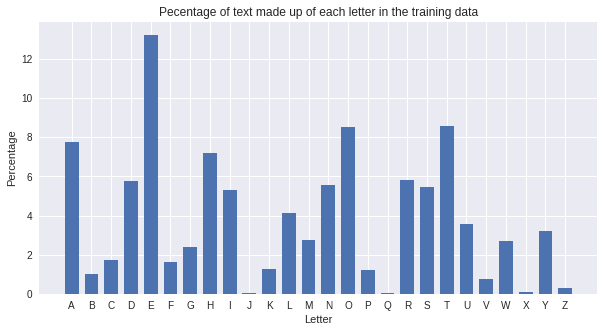

In [11]:
# Get some knowledge
how_english_is = get_letter_percentages(training_data)

# Plot it
plot_letter_percentages(how_english_is, 
              "Pecentage of text made up of each letter in the training data")

### The Enccrypted Message

Now let's get a look at the encrypted message. We don't know the key, so we want the program to use it's knowledge of English to figure out which of the possible decryptions is correct.



In [12]:
with open(FILE_TO_DECRYPT, 'r') as f:
    mystery_message = f.read()
 
print(mystery_message)

"BZCC KYV NZTBVU NZKTY FW KYV NVJK," REJNVIVU FQ.

"SLK Z TREEFK!" VOTCRZDVU UFIFKYP, XIVRKCP JLIGIZJVU.

"PFL BZCCVU KYV NZKTY FW KYV VRJK REU PFL NVRI KYV JZCMVI JYFVJ, NYZTY
SVRI R GFNVIWLC TYRID. KYVIV ZJ EFN SLK FEV NZTBVU NZKTY CVWK ZE RCC
KYZJ CREU, REU NYVE PFL TRE KVCC DV JYV ZJ UVRU Z NZCC JVEU PFL SRTB KF
BREJRJ--SLK EFK SVWFIV."

KYV CZKKCV XZIC SVXRE KF NVVG, JYV NRJ JF DLTY UZJRGGFZEKVU; REU KYV
VPVJ NZEBVU RXRZE REU CFFBVU LGFE YVI REOZFLJCP, RJ ZW KYV XIVRK FQ
WVCK KYRK JYV TFLCU YVCG YZD ZW JYV NFLCU.

"Z EVMVI BZCCVU REPKYZEX, NZCCZEXCP," JYV JFSSVU. "VMVE ZW Z NREKVU KF,
YFN TFLCU Z BZCC KYV NZTBVU NZKTY? ZW PFL, NYF RIV XIVRK REU KVIIZSCV,
TREEFK BZCC YVI PFLIJVCW, YFN UF PFL VOGVTK DV KF UF ZK?"

"Z UF EFK BEFN," JRZU KYV YVRU; "SLK KYRK ZJ DP REJNVI, REU LEKZC KYV
NZTBVU NZKTY UZVJ PFL NZCC EFK JVV PFLI LETCV REU RLEK RXRZE. IVDVDSVI
KYRK KYV NZKTY ZJ NZTBVU--KIVDVEUFLJCP NZTBVU--REU FLXYK KF SV BZCCVU.
EFN XF, REU UF EFK RJB KF JVV DV RXRZE LEKZC PFL YRMV UFEV PF

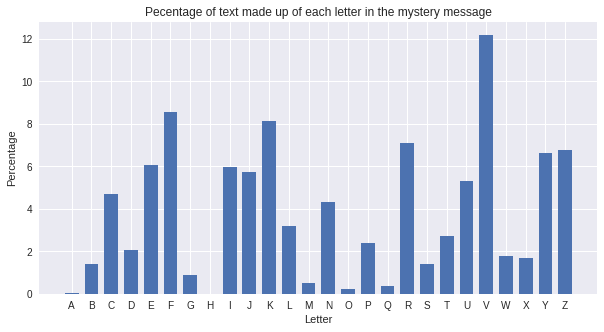

In [13]:
plot_letter_percentages(get_letter_percentages(mystery_message), 
                        "Pecentage of text made up of each letter in the mystery message")

## Decrypt with all possible keys

Try each of the possible decription keys for the mystery message and compare it to what we learned from the training data. Create a score for each key showing how different it is from the training data.

In [0]:
def get_scores_for_all_keys(mystery_message):
    """
    Calulate a score for each possible encryption key for how
    much like English the message is when decryted with that key
    """
    key_scores = {}

    # Try NUM_LETTERS decryptions, and make a score
    for key in range(0, NUM_LETTERS):

        # Make a trial decryption using this key
        possible_decrypt = decrypt(mystery_message, key)

        # Get the letter counts
        how_trial_is = get_letter_percentages(possible_decrypt)

        this_score = 0

        # Calculate a score for this decrypt. 
        for c in LETTERS:
            this_score += abs(how_trial_is[c] - how_english_is[c]) 

        # Remember the score for this letter
        key_scores[key] = this_score
        
    return key_scores
  
key_scores = get_scores_for_all_keys(mystery_message)

Let's look at the scores for each key.

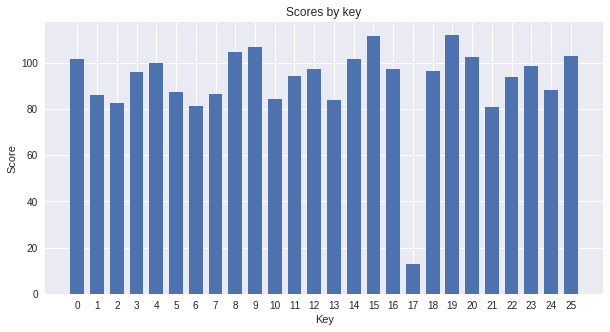

In [15]:
### Helper function just to print the scores -- not needed
### for the actual learning
def plot_scores(key_scores, title):
  """
  Plot the results of a call to get_letter_percentages()
  """
  index = np.arange(NUM_LETTERS)
  bar_width = 0.7
  cols = [key for key in range(NUM_LETTERS)]
  vals = [key_scores[K] for K in cols]
  plt.subplots(1, figsize=(10,5))
  plt.bar(index, vals, width=bar_width, label=cols)
  plt.xticks(index, cols)
  plt.xlabel("Key")
  plt.ylabel("Score")
  plt.title(title)
  plt.show() 

plot_scores(key_scores, "Scores by key")

### Do we want the low score or the high score?

In Machine Learning, generally a score like this indicates how far away we are from what we want, so scores closer to 0 are better.

The key we are looking for is very likely the key with the LOWEST score.

## Figure out the key

The program will use the scores to pick the key who results are closest to what it has learned about English.

In [16]:
# Find the best match
def get_key_with_min_score(key_scores):
    best_key = 0
    min_so_far = key_scores[0]

    for key in range(1, NUM_LETTERS):
        if key_scores[key] < min_so_far:
            best_key = key
            min_so_far = key_scores[key]
    
    # Fancy way: best_key = min(key_scores, key=lambda x: key_scores[x])
    return best_key

# Run it
selected_key = get_key_with_min_score(key_scores)
print("Selected key:", selected_key, "\n")

Selected key: 17 



The program has picked a key. Does this key work for the message?

In [17]:
# Show the results
print(decrypt(mystery_message, selected_key))

"KILL THE WICKED WITCH OF THE WEST," ANSWERED OZ.

"BUT I CANNOT!" EXCLAIMED DOROTHY, GREATLY SURPRISED.

"YOU KILLED THE WITCH OF THE EAST AND YOU WEAR THE SILVER SHOES, WHICH
BEAR A POWERFUL CHARM. THERE IS NOW BUT ONE WICKED WITCH LEFT IN ALL
THIS LAND, AND WHEN YOU CAN TELL ME SHE IS DEAD I WILL SEND YOU BACK TO
KANSAS--BUT NOT BEFORE."

THE LITTLE GIRL BEGAN TO WEEP, SHE WAS SO MUCH DISAPPOINTED; AND THE
EYES WINKED AGAIN AND LOOKED UPON HER ANXIOUSLY, AS IF THE GREAT OZ
FELT THAT SHE COULD HELP HIM IF SHE WOULD.

"I NEVER KILLED ANYTHING, WILLINGLY," SHE SOBBED. "EVEN IF I WANTED TO,
HOW COULD I KILL THE WICKED WITCH? IF YOU, WHO ARE GREAT AND TERRIBLE,
CANNOT KILL HER YOURSELF, HOW DO YOU EXPECT ME TO DO IT?"

"I DO NOT KNOW," SAID THE HEAD; "BUT THAT IS MY ANSWER, AND UNTIL THE
WICKED WITCH DIES YOU WILL NOT SEE YOUR UNCLE AND AUNT AGAIN. REMEMBER
THAT THE WITCH IS WICKED--TREMENDOUSLY WICKED--AND OUGHT TO BE KILLED.
NOW GO, AND DO NOT ASK TO SEE ME AGAIN UNTIL YOU HAVE DONE YO

## Putting it all together -- another encrypted message


In [18]:
with open(ANOTHER_MYSTERY, 'r') as f:
    second_mystery = f.read()
    
print(second_mystery)

RFGQ GQ UYBC ZYWYPB, RFC NSZJGA GLDMPKYRGML MDDGACP DMP JMSBMSL AMSLRW 
NSZJGA QAFMMJQ. 

ZCAYSQC MD RFC DMPCAYQR MD GKNCLBGLE ZYB UCYRFCP, JMSBMSL AMSLRW NSZJGA
QAFMMJQ YLB GRQ YBKGLGQRPYRGTC MDDGACQ UGJJ ZC AJMQCB RMKMPPMU. YJJ 
YARGTGRGCQ GLTMJTGLE QAFMMJ DYAGJGRGCQ YPC AYLACJJCB. 

RM PCNCYR, JMSBMSL AMSLRW NSZJGA QAFMMJQ YLB YBKGLGQRPYRGTC MDDGACQ 
YPC AJMQCB RMKMPPMU.

UC UGJJ LMU PCNCYR RFGQ KCQQYEC GL QNYLGQF.



In [19]:
key_scores = get_scores_for_all_keys(second_mystery)
selected_key = get_key_with_min_score(key_scores)
print("Selected key:", selected_key)

Selected key: 24


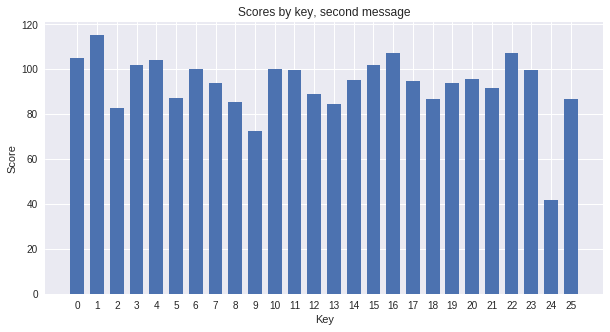

In [20]:
plot_scores(key_scores, "Scores by key, second message")

In [21]:
# Show the results
print(decrypt(second_mystery, selected_key))

THIS IS WADE BAYARD, THE PUBLIC INFORMATION OFFICER FOR LOUDOUN COUNTY 
PUBLIC SCHOOLS. 

BECAUSE OF THE FORECAST OF IMPENDING BAD WEATHER, LOUDOUN COUNTY PUBLIC
SCHOOLS AND ITS ADMINISTRATIVE OFFICES WILL BE CLOSED TOMORROW. ALL 
ACTIVITIES INVOLVING SCHOOL FACILITIES ARE CANCELLED. 

TO REPEAT, LOUDOUN COUNTY PUBLIC SCHOOLS AND ADMINISTRATIVE OFFICES 
ARE CLOSED TOMORROW.

WE WILL NOW REPEAT THIS MESSAGE IN SPANISH.

